In [1]:
import numpy as np 
import pyts 
import matplotlib.pyplot as plt
import bag2graph
# import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from sklearn.preprocessing import LabelEncoder
import networkx as nx 

%load_ext autoreload
%autoreload 2

In [2]:
import pyts.datasets

x_train, x_test, y_train, y_test = pyts.datasets.load_basic_motions(return_X_y=True)#fetch_ucr_dataset('Strawberry',use_cache=False,data_home=return_X_y=True)

total_labels = np.unique(y_train)
# print(total_labels)
label_map = dict(zip(total_labels, range(len(total_labels))))

temp_ytrain = []
for t in y_train:
    temp_ytrain.append(label_map[t])
temp_ytest = []
for t in y_test:
    temp_ytest.append(label_map[t])

y_test = np.array(temp_ytest)
y_train = np.array(temp_ytrain)



x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40, 6, 100), (40,), (40, 6, 100), (40,))

In [15]:
b2g = bag2graph.Bag2Graph(10, 3, 3, channel_size=x_train.shape[1])

t = b2g.apply_bow(x_train, y_train)

# multivariate_graph = b2g.get_cooc_matrix(x_train[0])


{'ccb': 0, 'bcc': 1, 'aab': 2, 'baa': 3, 'cac': 4, 'aca': 5, 'bcb': 6, 'abc': 7, 'cbb': 8, 'cba': 9}
Filtered 10 top words : ['ccb' 'bcc' 'aab' 'baa' 'cac' 'aca' 'bcb' 'abc' 'cbb' 'cba'] 

(40, 6)
shape (40, 6)


In [16]:
single_data = t[0]

single_data.shape, single_data

((6,),
 array([array(['bcb', 'cbb', 'cbb', 'abc', 'bcb', 'cbb', 'cba', 'cbb', 'cba',
               'abc', 'bcb', 'cbb', 'bcb', 'cbb', 'abc', 'bcb', 'bcb', 'cba',
               'bcb', 'cbb'], dtype='<U3')                                   ,
        array(['abc', 'bcb', 'cba', 'abc', 'cba', 'abc', 'cba', 'abc', 'bcb',
               'cba', 'abc', 'cba', 'abc', 'bcb', 'bcb', 'abc', 'cba', 'abc',
               'bcb', 'cba', 'bcb', 'cba', 'abc'], dtype='<U3')              ,
        array(['cba', 'abc', 'bcb', 'cba', 'abc', 'bcb', 'cba', 'abc', 'bcb',
               'cba', 'abc', 'cba', 'abc', 'bcb', 'cba', 'cba', 'bcb', 'cba',
               'abc', 'cba', 'abc', 'bcb', 'cba', 'bcb', 'bcb'], dtype='<U3'),
        array(['cba', 'abc', 'cba', 'abc', 'bcb', 'cbb', 'abc', 'bcb', 'cba',
               'cbb', 'bcb', 'cba', 'abc', 'bcb', 'abc', 'cba', 'bcb', 'cba',
               'bcb'], dtype='<U3')                                          ,
        array(['abc', 'cba', 'abc', 'cba', 'abc', 'cb

In [5]:
edges_with_weight = b2g.get_inx_cooc_matrix(0, 0)

In [6]:
ebola = b2g.get_cooc_matrix(0)

[array([[6, 6, 1],
       [6, 8, 5],
       [6, 9, 1],
       [7, 6, 3],
       [8, 6, 1],
       [8, 7, 2],
       [8, 8, 1],
       [8, 9, 2],
       [9, 6, 1],
       [9, 7, 1],
       [9, 8, 1]]), array([[6, 6, 1],
       [6, 7, 1],
       [6, 9, 4],
       [7, 6, 4],
       [7, 9, 4],
       [9, 6, 1],
       [9, 7, 7]]), array([[6, 6, 1],
       [6, 9, 6],
       [7, 6, 5],
       [7, 9, 2],
       [9, 6, 2],
       [9, 7, 7],
       [9, 9, 1]]), array([[6, 7, 1],
       [6, 8, 1],
       [6, 9, 3],
       [7, 6, 3],
       [7, 9, 2],
       [8, 6, 1],
       [8, 7, 1],
       [9, 6, 2],
       [9, 7, 3],
       [9, 8, 1]]), array([[6, 6, 1],
       [6, 7, 2],
       [6, 9, 1],
       [7, 6, 2],
       [7, 9, 5],
       [8, 6, 1],
       [9, 7, 4],
       [9, 8, 1]]), array([[6, 7, 2],
       [6, 9, 6],
       [7, 6, 7],
       [7, 9, 1],
       [9, 6, 1],
       [9, 7, 7]])]


In [7]:
grafo1 = ebola[0]
print(grafo1)
adj_m = np.zeros((10,10))

adj_m[grafo1[:,0], grafo1[:,1]] = grafo1[:,2]

# row_sum = adj_m.sum(axis=1)

print(adj_m)

# norm_m = adj_m / row_sum[:, np.newaxis]
# np.nan_to_num(norm_m, nan = 0, copy=False)

# norm_m, row_sum

[[6 6 1]
 [6 8 5]
 [6 9 1]
 [7 6 3]
 [8 6 1]
 [8 7 2]
 [8 8 1]
 [8 9 2]
 [9 6 1]
 [9 7 1]
 [9 8 1]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 5. 1.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 2. 1. 2.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]]


In [8]:
print(grafo1, grafo1.shape)

pairs, edges = grafo1[:, :2], grafo1[:, 2].T
# print(grafo1, pairs, edges)
triplets, inx  = np.unique(grafo1[:, :1], axis=0, return_index=True)

triplets, inx


[[6 6 1]
 [6 8 5]
 [6 9 1]
 [7 6 3]
 [8 6 1]
 [8 7 2]
 [8 8 1]
 [8 9 2]
 [9 6 1]
 [9 7 1]
 [9 8 1]] (11, 3)


(array([[6],
        [7],
        [8],
        [9]]),
 array([0, 3, 4, 8]))

In [9]:
print(inx)

split_blocks = np.split(grafo1, inx[1:])
# print(split_blocks) 
print(split_blocks[0])
print(split_blocks[0].shape)
temp = split_blocks[0][:, 2]
print(temp)
row_norm = temp.sum()

print(row_norm)

kek = split_blocks[0][:,2] / row_norm
kek



[0 3 4 8]
[[6 6 1]
 [6 8 5]
 [6 9 1]]
(3, 3)
[1 5 1]
7


array([0.14285714, 0.71428571, 0.14285714])

In [10]:
grafo1

array([[6, 6, 1],
       [6, 8, 5],
       [6, 9, 1],
       [7, 6, 3],
       [8, 6, 1],
       [8, 7, 2],
       [8, 8, 1],
       [8, 9, 2],
       [9, 6, 1],
       [9, 7, 1],
       [9, 8, 1]])

In [11]:
grafo1[0]

array([6, 6, 1])

[(6, 6), (6, 8), (6, 9), (8, 6), (8, 7), (8, 8), (8, 9), (9, 6), (9, 7), (9, 8), (7, 6)] <class 'networkx.classes.reportviews.OutEdgeView'>


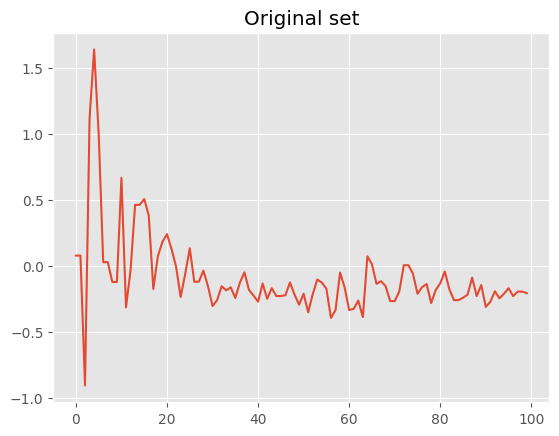

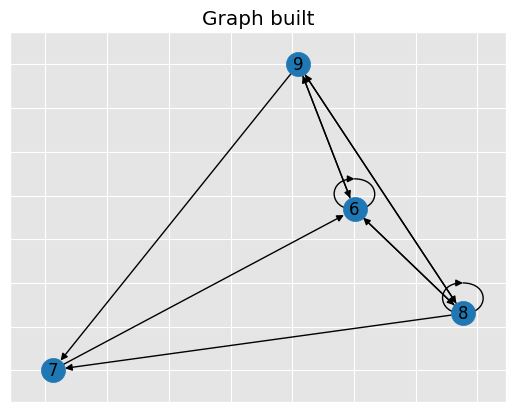

In [12]:
import networkx as nx
plt.style.use('ggplot')

G = nx.DiGraph()
# for g in grafo1:
#     t = (int(g[0]), int(g[1]), int(g[2]))
#     print(t, type(t))
G.add_weighted_edges_from(grafo1)#, weight=1)

print(G.edges, type(G.edges))

plt.plot(x_train[0,0])
# plt.show()
plt.title('Original set')
plt.show()
plt.title("Graph built")
nx.draw_networkx(G)#, pos = G.adj)


In [13]:
G.adj

AdjacencyView({6: {6: {'weight': 1}, 8: {'weight': 5}, 9: {'weight': 1}}, 8: {6: {'weight': 1}, 7: {'weight': 2}, 8: {'weight': 1}, 9: {'weight': 2}}, 9: {6: {'weight': 1}, 7: {'weight': 1}, 8: {'weight': 1}}, 7: {6: {'weight': 3}}})

In [14]:
pos=nx.get_edge_attributes(G)

TypeError: get_edge_attributes() missing 1 required positional argument: 'name'